## 16장 텍스트 마이닝

### (1) 웹 스크래핑

In [1]:
#1. 모듈 및 함수 불러오기
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import re

#2. 리뷰와 평점을 담을 빈 리스트 생성
score = []
review = []

#3. 리뷰 스크래핑
for i in range(1, 1001) :
    #3-1. HTML 소스코드 가져오기
    base_url="https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=161967&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page="+str(i)
    html = requests.get(base_url)

    #3-2. HTML 파싱
    soup = bs(html.text, 'html.parser')

    #3-3. 평점 및 리뷰 텍스트 추출
    for j in range(10):
        score.append(soup.select('div.star_score > em')[j].text)
        review.append(soup.find_all('span', {'id': re.compile('_filtered_ment_\d')})[j].text.strip())
 
#4.하나의 데이터프레임으로 저장
df = pd.DataFrame(list(zip(review, score)), columns=['review', 'score'])
df.head()


,review,score
0,"비에 젖지 않는 고급 장난감 텐트와, 비에 젖다 못해 잠겨버리는 반지하 가구",10
1,최근 본 영화중 가장 충격적이었음... 근데 보니까 15세말고 19세 걸어야될것같던데..,10
2,"지하철이라는 단어가 언급되는 순간, 대다수의 관객은 자신이 어디에 이입할 지를 안다.",10
3,전 가정부가 집 벨 누를 때 부터 이 영화는 장르가 바뀐다... 역대급 꿀잼영화,10
4,황금종려상 수상작을 자막 없이 볼 수 있다는 것 자체로 좋다.,10


In [2]:
df['score'].value_counts()

10    4778
1     1264
8     1099
9      680
2      675
6      634
4      337
7      302
5      158
3       73
Name: score, dtype: int64

### (2) 빈도 분석

- 데이터 전처리

In [3]:
#1. 모듈 및 함수 불러오기
from konlpy.tag import Okt

#2. 문자열 변환
string= ",".join(review)

#3. 명사 추출
okt = Okt( )
nouns=okt.nouns(string)

#4. 두 글자 이상 단어 추출
word_list =[x for x in nouns if len(x) >= 2]

#5. 불용어 제거
stopwords=["영화", "그냥", "정말", "진짜"]
word_list=[i for i in word_list if i not in stopwords]

print(word_list)

['고급', '장난감', '텐트', '반지하', '가구', '최근', '가장', '충격', '지하철', '단어', '언급', '순간', '대다수', '관객', '자신', '어디', '이입', '가정부', '부터', '장르', '역대', '꿀잼', '황금종려상', '수상작', '자막', '자체', '반지하', '제일', '아래', '지하도', '뭔가', '내내', '가슴', '뭔가', '수석', '누군가', '냄새', '평가', '묘사', '또한', '권력', '냄새', '서로', '경계', '구분', '동물', '세계', '우리', '사회', '박서준', '또한', '누군가', '사람', '냄새', '얼굴', '등급', '정이', '청소년', '감당', '버거운', '내용', '봉테', '일이', '간과', '납골당', '눈높이', '가장', '죽음', '빈부격차', '막판', '기우', '바램', '계획', '계획', '누군가', '빗물', '장난감', '텐트', '다른', '누군가', '정물', '계획', '우리네', '사회', '구조', '냉혹', '현실', '연출', '수석', '끼리', '우리', '사회', '축소', '사이다', '소주', '기분', '두번째', '세번', '인디언', '추장', '모자', '송강호', '표정', '이영화', '모두', '박사', '기택', '냄새', '대해', '언급', '기우', '기정', '냄새', '대해', '언급', '기우', '기정은', '명문', '교육', '자기', '선상', '사람', '인식', '기택', '하등', '사람', '인식', '때문', '변기', '담배', '장면', '연기', '시나리오', '가족', '희비극', '신파', '조금', '생각', '데리', '추천', '누군가', '모든', '재산', '홍수', '누구', '다음', '미세먼지', '집의', '정원', '운치', '장치', '우리', '계획', '이유', '대왕', '카스테라', '때문', '다른', '사람', '순간', '

- 빈도 분석 수행

In [4]:
from collections import Counter

count = Counter(word_list)
print(count)


Counter({'생각': 1007, '사람': 773, '감독': 680, '봉준호': 641, '기생충': 640, '보고': 630, '기분': 606, '가족': 457, '현실': 450, '장면': 444, '냄새': 435, '연기': 380, '최고': 341, '충격': 311, '작품': 293, '사회': 286, '느낌': 282, '재미': 281, '계획': 273, '송강호': 272, '내용': 271, '평점': 271, '배우': 267, '우리': 249, '하나': 243, '부자': 232, '관람': 228, '가난': 227, '반지하': 216, '정도': 212, '별로': 212, '마음': 211, '이해': 211, '스토리': 209, '내내': 208, '황금종려상': 206, '처음': 205, '보기': 201, '표현': 192, '마지막': 191, '시간': 181, '기대': 181, '뭔가': 180, '여운': 180, '다시': 179, '연출': 171, '역시': 171, '의미': 162, '이야기': 159, '등급': 157, '한국': 157, '몰입': 156, '계속': 148, '인생': 147, '때문': 145, '모두': 144, '조여정': 142, '장르': 140, '인간': 137, '한국영': 136, '모습': 132, '가장': 131, '관객': 131, '한번': 128, '중간': 127, '이유': 126, '소름': 125, '모든': 120, '대한': 119, '살인': 118, '전개': 117, '가슴': 116, '이정은': 116, '결말': 115, '공감': 113, '개인': 111, '예술': 111, '가정부': 108, '자체': 107, '이선균': 107, '감정': 106, '절대': 105, '영화관': 103, '지하': 103, '이상': 102, '보지': 102, '계급': 101, '이건': 101, '평론가':

- 워드클라우드 생성

In [6]:
#1. 라이브러리 설치 및 모듈/함수 불러오기
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#2. 워드클라우드 생성
font_path = '/usr/share/fonts/truetype/nanum/malgun.ttf'
wc = WordCloud(width = 800, height = 800, font_path = font_path, background_color='white')

#3. 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wc.generate_from_frequencies(count))
plt.axis("off")

(-0.5, 799.5, 799.5, -0.5)

### (3) 버즈 분석

- 오픈 API를 호출하여 데이터 불러오기

In [7]:
#1. 라이브러리 불러오기
import json
import urllib

#2. 요청 정보 입력
request = urllib.request.Request("https://openapi.naver.com/v1/datalab/search")
request.add_header("X-Naver-Client-Id", "vppPR7VLu9XbWzzbCuDL")
request.add_header("X-Naver-Client-Secret","O758KnQqQm")
request.add_header("Content-Type","application/json") 

#3. 요청 본문 생성
body_dict = {"startDate": "2019-01-01",
            "endDate" : "2019-12-20",
            "timeUnit": "month",
            "keywordGroups":[{"groupName": "기생충","keywords":["기생충"]}]}
body = json.dumps(body_dict)
body 


'{"startDate": "2019-01-01", "endDate": "2019-12-20", "timeUnit": "month", "keywordGroups": [{"groupName": "\\uae30\\uc0dd\\ucda9", "keywords": ["\\uae30\\uc0dd\\ucda9"]}]}'

In [8]:
#1. 서버에 정보 요청
response = urllib.request.urlopen(request, data=body.encode("utf-8"))

#2. 응답 상태 코드 가져오기
rescode = response.getcode( )

#3. 값이 200인 경우에만 데이터 추출
if(rescode==200):
    scraped = response.read( )
else:
    print("Error Code:" + rescode)

#4. json 데이터 타입 변환
result = json.loads(scraped)
result

{'startDate': '2019-01-01',
 'endDate': '2019-12-31',
 'timeUnit': 'month',
 'results': [{'title': '기생충',
   'keywords': ['기생충'],
   'data': [{'period': '2019-01-01', 'ratio': 0.30914},
    {'period': '2019-02-01', 'ratio': 0.22026},
    {'period': '2019-03-01', 'ratio': 0.2696},
    {'period': '2019-04-01', 'ratio': 12.76865},
    {'period': '2019-05-01', 'ratio': 60.0763},
    {'period': '2019-06-01', 'ratio': 100},
    {'period': '2019-07-01', 'ratio': 19.64588},
    {'period': '2019-08-01', 'ratio': 20.11692},
    {'period': '2019-09-01', 'ratio': 6.2166},
    {'period': '2019-10-01', 'ratio': 4.35796},
    {'period': '2019-11-01', 'ratio': 5.62697},
    {'period': '2019-12-01', 'ratio': 5.92734}]}]}

- 버즈 그래프 출력

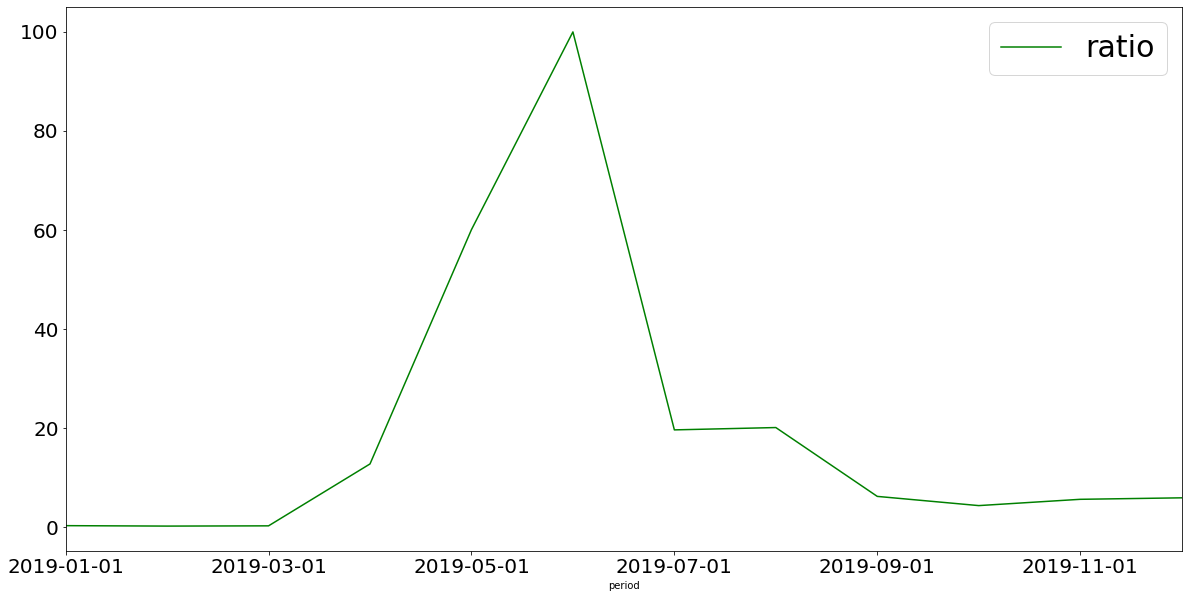

In [9]:
#1. 모듈 및 함수 임포트
import pandas as pd
import matplotlib.pyplot as plt

#2. 데이터 프레임 변환
data = pd.DataFrame(result["results"][0]["data"]).set_index('period')

#3. 그래프 생성
data.plot(color = 'g', figsize = (20,10))
plt.legend(fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


### (4) 토픽 모델링

- 데이터 전처리

In [10]:
#1. 모듈 및 함수 불러오기
from sklearn.feature_extraction.text import TfidfVectorizer

#2. 문서 단어 행렬 변환
stopword = ['영화', '하지만', '근데', '대한', '이게', '없는', '영화가', '영화는', '영화를', 'ㅋㅋ', '내내', '봤습니다', '보고', '보는', '그냥', '많이', '내가',  '그리고', '진짜', '정말', '너무', '나는', '있는', '가장', 'ㅎㅎ']
tv= TfidfVectorizer(max_df=.15, ngram_range=(1,4), min_df=2, stop_words = stopword)
vect = tv.fit_transform(review)

print("문서 단어 행렬 변환 결과: \n", vect.toarray())

문서 단어 행렬 변환 결과: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


- 토픽 모델링 수행

In [12]:
#1. 모듈 및 함수 불러오기
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

#2. LDA 모형 생성 및 변환
model = LatentDirichletAllocation(n_components=5, learning_method="batch", max_iter=25, random_state=0)
model.fit_transform(vect)

#3. 토픽별 주요 단어 출력
for topic_index, topic in enumerate(model.components_):
 print('Topic #',topic_index+1) 
 topic_index = topic.argsort()[::-1]
 feature_names = ' '.join([tv.get_feature_names()[i] for i in topic_index[:10]])

Topic # 1
Topic # 2
Topic # 3
Topic # 4
Topic # 5
